# Part III - Dogs VS Cats 

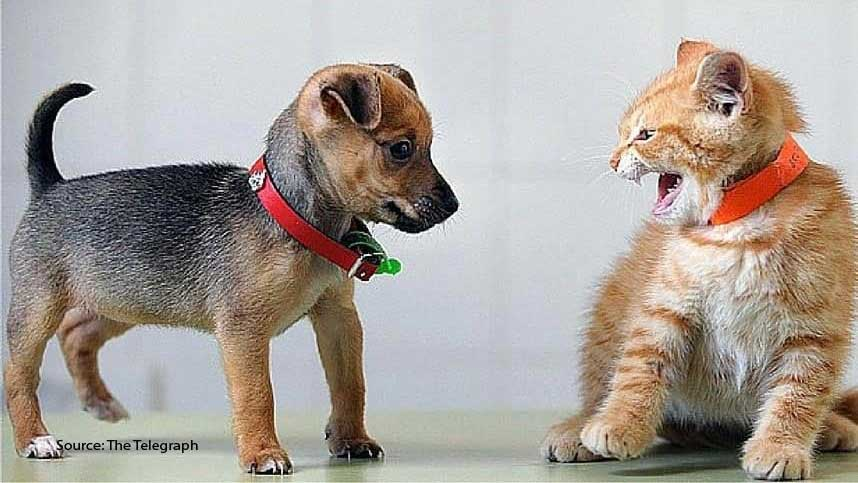

In [65]:
import cv2 # openCv
from os import listdir
from os.path import isfile, join
import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#import warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd
import zipfile
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam,RMSprop
from keras.preprocessing.image import ImageDataGenerator 
from keras import backend
import cv2 
from keras import applications

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

##### Link to kaggle: https://www.kaggle.com/c/dogs-vs-cats

We would like to create an array which will contain our images:

In [66]:
main = "C:\Haim\Anaconda\Dogs_VS_Cats"
train = "train"
train = os.path.join(main,train)

test = "test1"
test = os.path.join(main,test)


IMAGE_FOLDER_PATH="C:\Haim\Anaconda\Dogs_VS_Cats/train"
FILE_NAMES=os.listdir(IMAGE_FOLDER_PATH)
WIDTH=150
HEIGHT=150

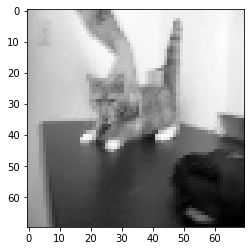

In [67]:
# random choose a single image from train dataset
for p in os.listdir(train):
    category = p.split(".")[0]
    image_read = cv2.imread(os.path.join(train,p),cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(image_read,dsize=(70,70))
    plt.imshow(img,cmap="gray")
    break

In [134]:
# create dataset
targets=list()
data = np.ndarray((25000,4096), dtype=np.uint8) # 25000 images , 64^2*64^2 = 4096 pixels
for i, file_name in enumerate(FILE_NAMES): 
    target = file_name.split(".")[0] # dog or cat
    full_path = os.path.join(IMAGE_FOLDER_PATH, file_name)
    img = cv2.imread(full_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_GRAY)
    resized_img = cv2.resize(gray_img, (64,64))
    targets.append(target) # add the correct label
    data[i, :] = resized_img.flatten()

In [135]:
data = pd.DataFrame(data, columns= ["pixel"+ str(i+1)for i in range(data.shape[1])])
data.head()

,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,...,pixel 4087,pixel 4088,pixel 4089,pixel 4090,pixel 4091,pixel 4092,pixel 4093,pixel 4094,pixel 4095,pixel 4096
0,170,176,183,188,192,196,200,202,205,208,...,10,9,3,3,3,2,2,2,2,2
1,43,42,36,29,41,43,72,38,37,37,...,77,64,38,39,56,58,53,72,68,29
2,45,46,46,57,56,51,58,50,51,46,...,76,79,90,142,162,150,139,151,171,158
3,220,222,231,226,234,226,225,227,229,226,...,248,240,234,228,212,205,205,220,214,213
4,114,122,86,90,138,148,133,192,210,230,...,100,98,105,94,91,88,98,106,94,87


In [136]:
labels = pd.DataFrame({"label":targets})
labels.sample(n = 4, random_state = 4).sort_values(by = 'label')

,label
1986,cat
944,cat
20921,dog
13294,dog


In [141]:
df = pd.concat([labels, data], axis=1)
df.sample(n = 4, random_state = 4).sort_values(by = 'label')

,label,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 4087,pixel 4088,pixel 4089,pixel 4090,pixel 4091,pixel 4092,pixel 4093,pixel 4094,pixel 4095,pixel 4096
1986,cat,32,37,152,160,169,154,148,133,152,...,129,125,122,121,119,118,118,119,117,115
944,cat,122,128,134,145,154,161,164,169,177,...,66,67,69,62,59,57,56,52,52,52
20921,dog,121,113,212,122,88,72,151,85,153,...,117,119,123,123,103,100,90,102,92,82
13294,dog,137,138,68,54,113,90,107,117,141,...,142,154,60,180,113,134,157,144,123,130


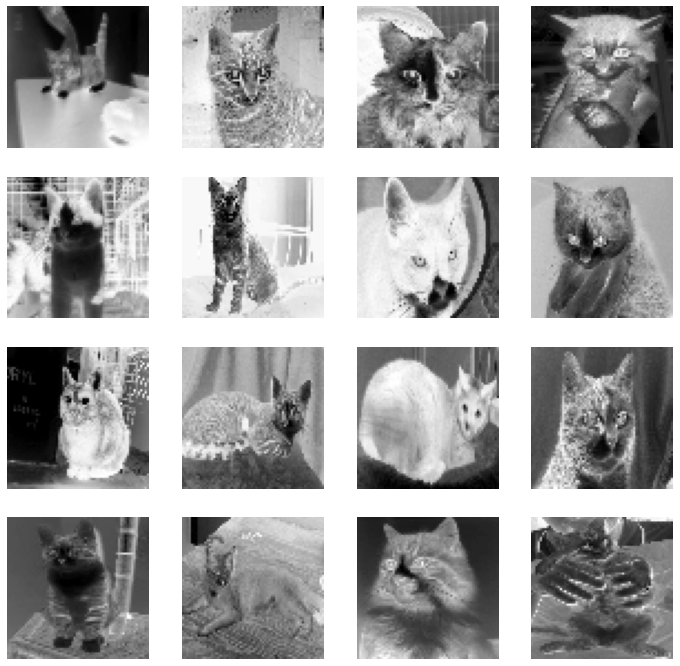

In [148]:
fig, axes = plt.subplots(4, 4, figsize = (12,12))
axes = axes.ravel()

for i in range(16):
    axes[i].imshow(data.values.reshape((data.shape[0], 64, 64))[i], cmap=plt.get_cmap('binary'))
    #axes[i].set_title("Outfit " + labels[i])
    axes[i].axis('off')
plt.show()

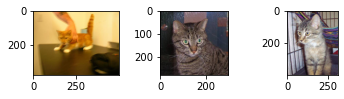

In [69]:
from matplotlib.image import imread
# create a grid of 3x3 images
for i in range(3):
    plt.subplot(331+i)
    filename = train+'/cat.'+str(i)+'.jpg'
    image = imread(filename)
    plt.imshow(image)
plt.show()   

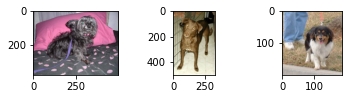

In [70]:
# create a grid of 3x3 images
for i in range(3):
    plt.subplot(331+i)
    filename=train+'/dog.'+str(i)+'.jpg'
    image=imread(filename)
    plt.imshow(image)
plt.show()  

In [71]:
for p in os.listdir(train):
    category = p.split(".")[0]
    image_read = cv2.imread(os.path.join(train,p),cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(image_read,dsize=(240,240))
    break

In [ ]:
# A function to show the labels
def num_to_name(label):
    labeled = label.copy()
    mapping = {0 :'Cat',
    1 :'Dog'}
    labeled = label.map(mapping)
    return labeled